#Paquetes necesarios

In [1]:
import cv2  
import math 
from ultralytics import YOLO

Desde cámara, detección con yolov8 y modelo nano. Visualización propia


0: 512x640 1 person, 2 cars, 1 truck, 285.5ms
Speed: 0.0ms preprocess, 285.5ms inference, 15.6ms postprocess per image at shape (1, 3, 512, 640)


Confidence ---> 0.47
Confidence ---> 0.42
hola
1906.0
3.8076923076923075
4
A3714LVWE

A3714LVWE


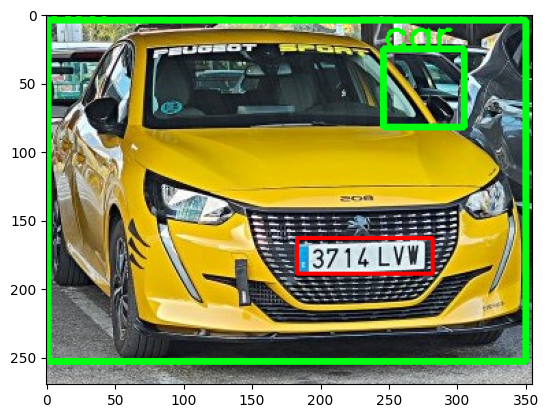

In [58]:
import cv2  
import math 
import matplotlib.pyplot as plt
import pytesseract
from ultralytics import YOLO

def text_processing(text):
    result = ""
    for i in text:
        if i.isalnum(): #Si es letra o número devuelve true
            result += i
    return result

# img = cv2.imread('bmw.jpg')
img = cv2.imread('images/Spain License Plate (49)..jpg')

model = YOLO('yolov8n.pt') #Contenedores

# Nombre de las distintas clases
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]


results = model(img, stream=True)
car_detections = [box for r in results for box in r.boxes if classNames[int(box.cls[0])] == "car"]

# Dibujar las detecciones de la clase "car"
for box in car_detections:
    
    confidence = math.ceil((box.conf[0] * 100)) / 100
    if (confidence > 0):
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        
        print("Confidence --->", confidence)

        cls = int(box.cls[0])

        
        
        # ----
        roi = img[y1:y2, x1:x2]

        # Convertir la ROI a escala de grises
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

        # Aplicar umbralización
        _, threshold = cv2.threshold(gray_roi, 127, 255, cv2.THRESH_BINARY)

        # Encontrar contornos en la imagen umbralizada
        contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Iterar sobre los contornos
        for contour in contours:
            # Ajustar un rectángulo al contorno
            x, y, w, h = cv2.boundingRect(contour)
            area = cv2.contourArea(contour)
            perimeter = 0.05*cv2.arcLength(contour, True) #Perímetro del contorno con una corrección para aplicar la aproximación de los lados a posteriori
            approx = cv2.approxPolyDP(contour, perimeter, True) #Aproximación de los lados
                     
            # Dibujar el rectángulo si es de un tamaño específico (puedes ajustar este criterio)
        #     if 5 < w < 100 and 5 < h < 100:
            if len(approx) == 4 and w/h > 3 and area > 1000: 
                # Dibujar el rectángulo en la imagen original
                print("hola")
                print(area)
                print(w/h)
                print(len(approx))
                cv2.rectangle(img, (x1 + x, y1 + y), (x1 + x + w, y1 + y + h), (0, 0, 255), 2)
                plate = gray_roi[y:y+h, x:x+w]
                plt.imshow(plate)
                cv2.imwrite('plate1'+'.png', plate)
                text = pytesseract.image_to_string(plate)
                text_processed = text_processing(text)
                print(text)   
                print(text_processed)     

        cv2.rectangle(img, (x1, y1), (x2, y2), (R, 255, B), 3)
        cv2.putText(img, classNames[cls], [x1, y1], cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, B), 2) 
        #Se pasa a la función auxiliar el texto detectado por la función del wrap pytesseract
         
        

# Mostrar la imagen con las detecciones de la clase "car"
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Diversos modelos preentrenados, visualizando

In [ ]:
# Carga del modelo
#model = YOLO('yolov8n.pt') #Contenedores
#model = YOLO('yolov8n-seg.pt') #Máscaras
model = YOLO('yolov8n-pose.pt')  #Pose

#Para un vídeo 
filename = "C:\Users\Minerva\Documents\VC\p5\video\video_coches.mp4"
results = model(filename, show=True)



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (81788241.py, line 7)

Reconocimiento de caracteres tras instalar pytesseract y tesseract

In [13]:
# Tesseract
import cv2
import pytesseract

# Previamente debes descargar los ejecutables
# Si la ruta de Tesseract no está en el PATH, ruta al ejecutable
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Lenguajes disponibles
print(pytesseract.get_languages(config=''))

#Cargo imagen y ocnvierto a RGB
img = cv2.imread('bmw.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Aplica reconocedor a imagen cargada
print(pytesseract.image_to_string(img_rgb))

['eng', 'osd', 'spa', 'spa_old']



Reconocimiento decaracteres tras instalar easyocr

In [ ]:
import easyocr

#Carga del modelo de lengua
reader = easyocr.Reader(['es']) 

#Reconocimiento de una imagen
result = reader.readtext('matricula_copia.tif')
print(result)

#Con restricción de caracteres reconocibles
#result = reader.readtext('toy.tif', allowlist ='0123456789')

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

In [ ]:
#geek for geeks
import pytesseract # this is tesseract module 
import matplotlib.pyplot as plt 
import cv2 # this is opencv module 
import glob 
import os